**PROJECT: Predicting House Prices Using Machine Learning**

**Why this project?**
* It covers the full data science workflow.
* Works well for beginners and intermediate interns.
* Uses a public dataset already available inside Seaborn → no need to download files in Colab.
* Teaches data cleaning, EDA, visualization, feature engineering, modeling, and evaluation.


Install & Import **Libraries**

In [ ]:
# Install any extra packages if needed
!pip install seaborn pandas scikit-learn matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


**Official Source**
The dataset was originally derived from:
Pace, R. Kelley, and Ronald Barry.
 "Sparse Spatial Autoregressions"
 Statistics & Probability Letters, 33(3), 1997: 291–297.
But you don’t need to visit the original source — sklearn already packages it and makes it available.


**Load the Dataset**

In [ ]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target  # target column
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


**Basic Data Exploration**

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [ ]:
print(df.describe())
df.isnull().sum()

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


**Exploratory Data Analysis (EDA)**

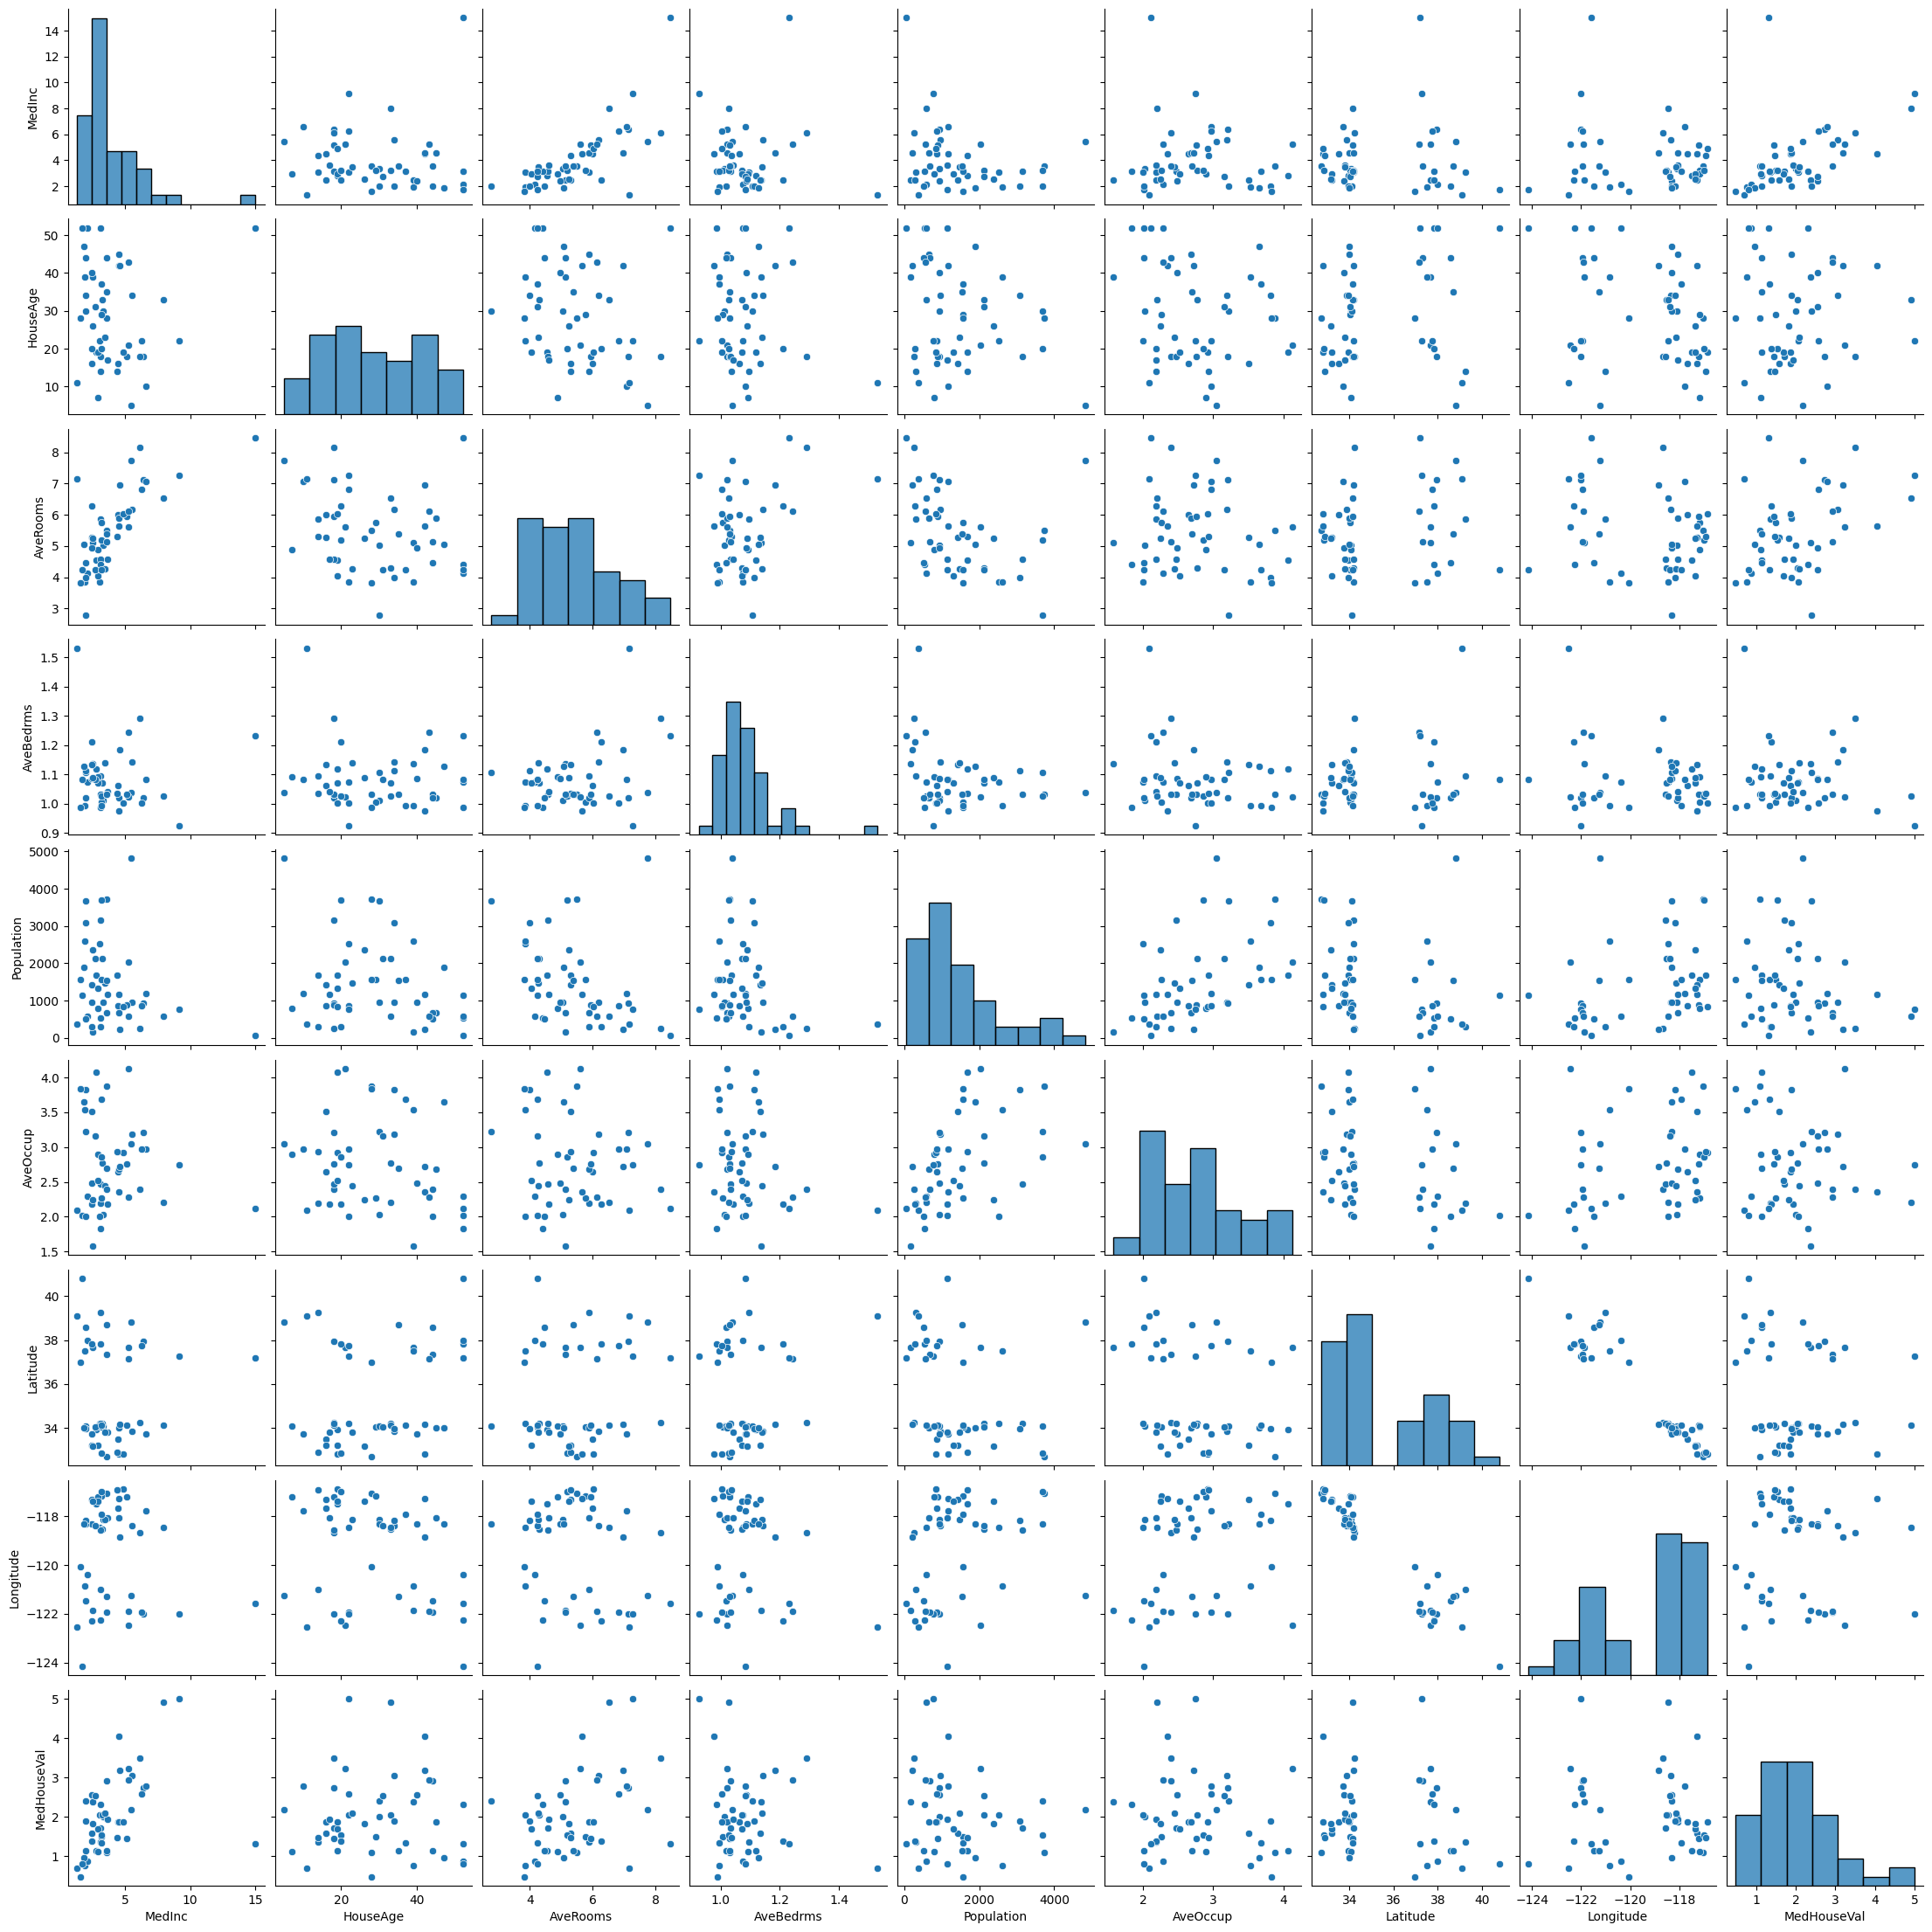

In [ ]:
#Pairplot (small subset for speed)

sns.pairplot(df.sample(50))
plt.show()


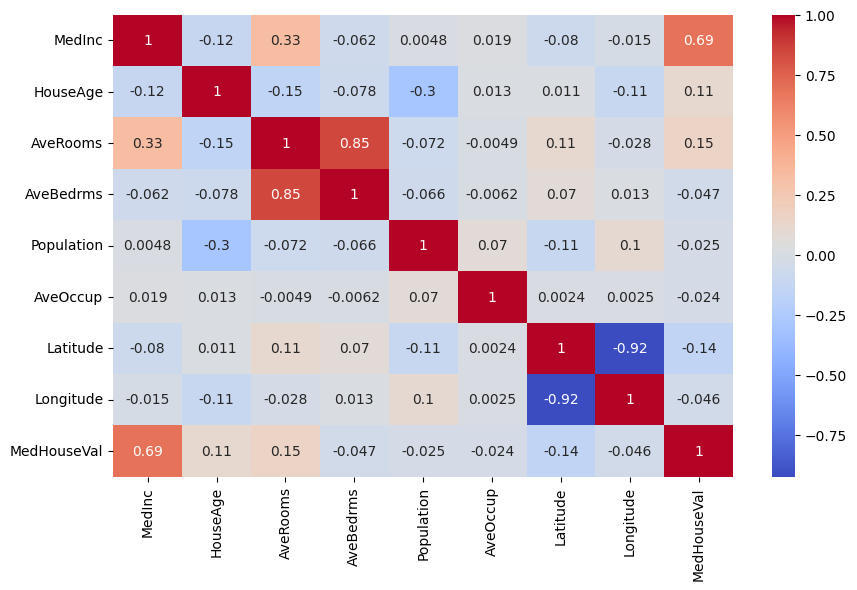

In [ ]:
#Correlation Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


**Feature & Target Split**

In [ ]:
X = df.drop("MedHouseVal", axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Scale the Features**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Train a Linear Regression Model**

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression MAE: 0.5332001304956565
Linear Regression RMSE: 0.7455813830127763
Linear Regression R2 Score: 0.575787706032451


**Train a Random Forest Model (Better Accuracy)**

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest MAE: 0.32681185043604677
Random Forest RMSE: 0.5039602414072009
Random Forest R2 Score: 0.8061857564039718


**Compare True vs Predicted**

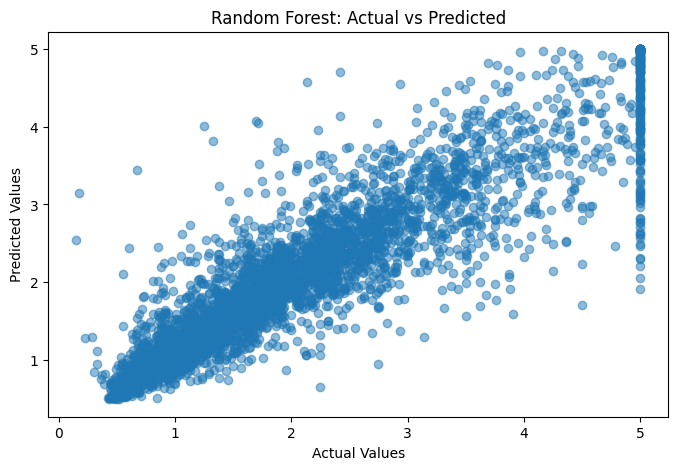

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


**Feature Importance**

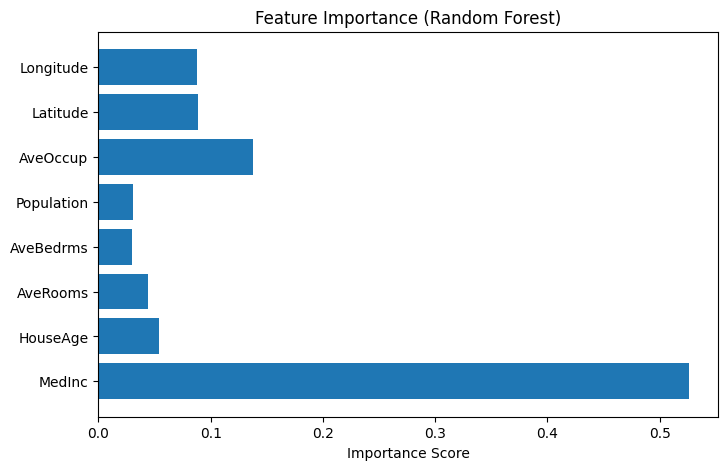

In [ ]:
features = X.columns
importances = rf.feature_importances_

plt.figure(figsize=(8,5))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.show()


In [ ]:
!pip install gradio scikit-learn pandas numpy

import gradio as gr
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# ==== 1. Load Dataset ====
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["MedHouseVal"] = housing.target

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# ==== 2. Train Model (Random Forest) ====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# ==== 3. Prediction Function ====
def predict_house_price(MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude):
    input_data = np.array([[MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]])
    prediction = model.predict(input_data)[0]
    return f"Predicted House Price: ${prediction * 100000:.2f}"

# ==== 4. Build Gradio Interface ====
inputs = [
    gr.Number(label="Median Income (10k USD)"),
    gr.Number(label="House Age (years)"),
    gr.Number(label="Average Number of Rooms"),
    gr.Number(label="Average Number of Bedrooms"),
    gr.Number(label="Population"),
    gr.Number(label="Average Occupancy"),
    gr.Number(label="Latitude"),
    gr.Number(label="Longitude"),
]

output = gr.Textbox(label="Prediction")

app = gr.Interface(
    fn=predict_house_price,
    inputs=inputs,
    outputs=output,
    title="California House Price Predictor",
    description="Enter house details to predict the median house value using a trained ML model."
)

# ==== 5. Launch App ====
app.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://55dc8113bc6f1d9ad7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
